In [54]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#PWD=os.getcwd()
PWD = "/media/juancho/TOSHIBA EXT/SC_evaluations_paper/sc2-benchmark"

PATH=os.path.join(PWD,"entropic_student/FSIM_W")
#PATH=os.path.join(PWD,"crbq/FSIM_N")

items = os.listdir(PATH)

directories = [item for item in items if (os.path.isdir(os.path.join(PATH,item)))]

Final_report = pd.DataFrame()

for config in directories:
    dir = os.path.join(PATH,config)    
    list_items = os.listdir(dir)    
    sim_dir=[item for item in list_items if os.path.isdir(os.path.join(dir,item))]

    #merge_files_path=os.path.join(dir,sim_dir[0])
    merge_files_path=dir
    print(sim_dir)
    full_report= pd.read_csv(os.path.join(merge_files_path,"fsim_full_report.csv"),index_col=[0])      
    full_report['MRAD']=abs(100*(full_report['fault_ACC@1']-full_report['gold_ACC@1'])/full_report['gold_ACC@1'])
    full_report['MRADk']=abs(100*(full_report['fault_ACC@k']-full_report['gold_ACC@k'])/full_report['gold_ACC@k'])
    full_report['AbsAD']=abs((full_report['fault_ACC@1']-full_report['gold_ACC@1']))
    full_report['AbsADk']=abs((full_report['fault_ACC@k']-full_report['gold_ACC@k']))
    full_report['bit_faulty_pos']=np.log2(full_report['bitmask']).astype(int)
    full_report["FsimID"]=None    
    index=(full_report['bit_faulty_pos']>-1)
    full_report.loc[index,'FsimID']=config # I capture the folder name and assign it to eavery roww of the dataframe
    full_report['split_config']=full_report['FsimID'].apply(lambda x: x.split('_')[0])

    Final_report=pd.concat([Final_report,full_report],axis=0,ignore_index=True)

print(Final_report.head())

index = (Final_report['split_config']=='cnf77')
Final_report.loc[index,'split_config']=0
index = (Final_report['split_config']=='cnf1')
Final_report.loc[index,'split_config']=1
index = (Final_report['split_config']=='cnf2')
Final_report.loc[index,'split_config']=2
index = (Final_report['split_config']=='cnf3')
Final_report.loc[index,'split_config']=3
index = (Final_report['split_config']=='cnf6')
Final_report.loc[index,'split_config']=4
index = (Final_report['split_config']=='cnf9')
Final_report.loc[index,'split_config']=5
index = (Final_report['split_config']=='cnf12')
Final_report.loc[index,'split_config']=6

index = (Final_report['split_config']=='cnf0.08')
Final_report.loc[index,'split_config']=7
index = (Final_report['split_config']=='cnf5.12')
Final_report.loc[index,'split_config']=8

Final_report = Final_report.sort_values(['split_config'],ascending=True)

index = (Final_report['split_config']==0)
Final_report.loc[index,'split_config']='BaseLine'
index = (Final_report['split_config']==1)
Final_report.loc[index,'split_config']='CR+BQ(1)'
index = (Final_report['split_config']==2)
Final_report.loc[index,'split_config']='CR+BQ(2)'
index = (Final_report['split_config']==3)
Final_report.loc[index,'split_config']='CR+BQ(3)'
index = (Final_report['split_config']==4)
Final_report.loc[index,'split_config']='CR+BQ(6)'
index = (Final_report['split_config']==5)
Final_report.loc[index,'split_config']='CR+BQ(9)'
index = (Final_report['split_config']==6)
Final_report.loc[index,'split_config']='CR+BQ(12)'
index = (Final_report['split_config']==7)
Final_report.loc[index,'split_config']='VAE-B0.08'
index = (Final_report['split_config']==8)
Final_report.loc[index,'split_config']='VAE-B5.12'

indexz = (((Final_report['split_config']=='VAE-B0.08') & (Final_report['layer']<4)) | 
          ((Final_report['split_config']=='VAE-B5.12') & (Final_report['layer']<4)) |
          (((Final_report['split_config']!='VAE-B0.08') & (Final_report['split_config']!='VAE-B5.12')) 
           & (Final_report['layer']<5))
          )


Final_report = Final_report.loc[indexz]




['log']
['log']
['log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']


['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
['FSIM_logs', 'log']
   layer  kernel  channel  row  col    bitmask  gold_ACC@1  gold_ACC@k  \
0      0      16        2    3    4   16777216        75.0        92.0   
1      0      84        1    3    2  134217728        75.0        92.0   
2      0      77        1    3    4   67108864        75.0        92.0   
3      0      84        0    1    2    2097152        75.0        92.0   
4      0      58        1   

In [41]:
print(Final_report.head())

        layer  kernel  channel  row  col     bitmask  gold_ACC@1  gold_ACC@k  \
248555      4     176       14    0    0  1073741824       77.32   93.360001   
228621      1      59       22    0    0  2147483648       77.32   93.360001   
228622      1       4        3    0    0    33554432       77.32   93.360001   
228623      1      61        5    0    0   268435456       77.32   93.360001   
228624      1      17       14    0    0    67108864       77.32   93.360001   

        img_Top1_Crit  img_Top1_SDC  ...  Ffree_Weight  Faulty_weight  \
248555           3862            15  ...  1.008803e+09   2.082545e+09   
228621              4          4996  ...  3.159296e+09   1.011813e+09   
228622             91          4896  ...  1.029402e+09   1.062956e+09   
228623              1          4879  ...  3.153509e+09   2.885073e+09   
228624              3          4997  ...  1.015803e+09   9.486946e+08   

           Abs_error       MRAD      MRADk      AbsAD     AbsADk  \
248555 -3.34

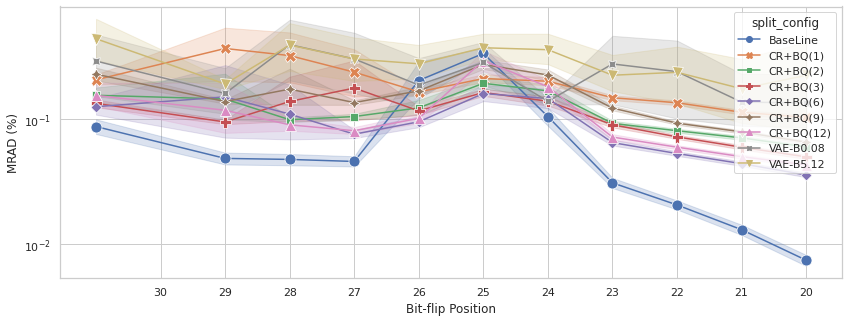

In [67]:

index = (Final_report['bit_faulty_pos']<32) & (Final_report['bit_faulty_pos']!=30) & (Final_report['layer']<5)

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(14, 5))
#sns.despine(f)
ax = sns.lineplot(data=Final_report.loc[index],x='bit_faulty_pos',y='MRAD',hue='split_config',style="split_config",markers=True, dashes=False, markersize=11)
ax.invert_xaxis()
#ax.legend(loc='lower left')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax, "upper right")
#ax.set_title("MRAD: FI all conv layers of Head model (0-4)")
#ax.set_yscale('log')
ax.set_ylabel('MRAD (%)')
ax.set_xlabel('Bit-flip Position')
ax.set_xticks(range(Final_report['bit_faulty_pos'].min(),Final_report['bit_faulty_pos'].max()))
ax.set_yscale('log')
f.savefig('W_bit-flip.pdf',format='pdf',bbox_inches='tight')

Text(0.5, 0, 'layer')

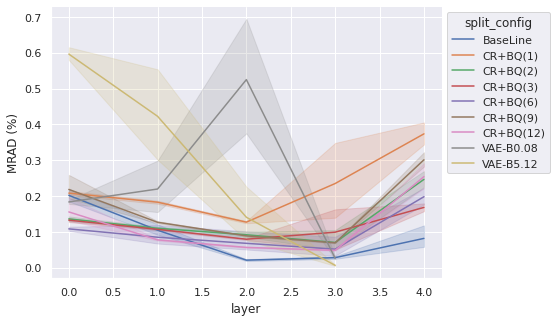

In [56]:
index = (Final_report['bit_faulty_pos']!=30) & (Final_report['layer']<5)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.lineplot(data=Final_report.loc[index],x='layer',y='MRAD',hue='split_config')
#ax.legend(loc='lower left')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#sns.move_legend(ax, "upper left")
#ax.set_title("MRAD: FI all conv layers of Head model (0-4)")
#ax.set_yscale('log')
ax.set_ylabel('MRAD (%)')
ax.set_xlabel('layer')

Text(0.5, 1.0, 'MRAD: FI only in the last layer of the Head model (4)')

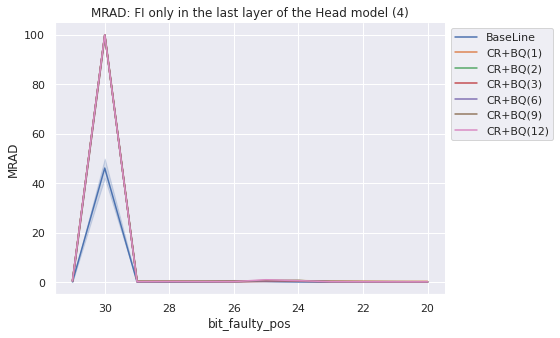

In [57]:

index = (Final_report['bit_faulty_pos']>15) & (Final_report['layer']==4)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.lineplot(data=Final_report.loc[index],x='bit_faulty_pos',y='MRAD',hue='split_config')
ax.invert_xaxis()
ax.legend(loc='lower left')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("MRAD: FI only in the last layer of the Head model (4)")

#ax.set_yscale('log')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[Text(0, 0, '4.9962'),
 Text(0, 0, '8.52288'),
 Text(0, 0, '8.29604'),
 Text(0, 0, '8.41982'),
 Text(0, 0, '8.28084'),
 Text(0, 0, '8.36343'),
 Text(0, 0, '8.26601'),
 Text(0, 0, '8.28362'),
 Text(0, 0, '8.61617')]

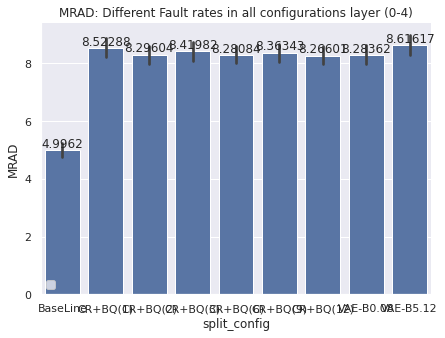

In [58]:
index = (Final_report['bit_faulty_pos']>-1) & (Final_report['layer']!=5)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.barplot(data=Final_report.loc[index],x='split_config',y='MRAD', color='C0')
ax.legend(loc='lower left')
ax.tick_params(axis='x', labelrotation=0)
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("MRAD: Different Fault rates in all configurations layer (0-4)")
ax.bar_label(ax.containers[0])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'MRAD: Different Fault rates in all configurations layer (4)')

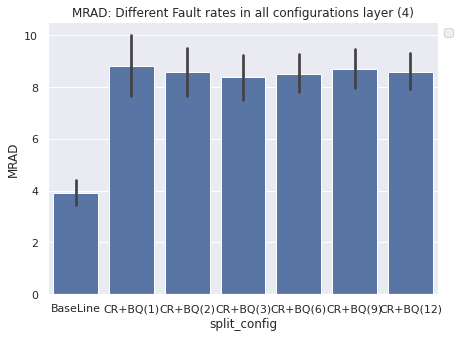

In [59]:
index = (Final_report['bit_faulty_pos']>-1) & (Final_report['layer']==4)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.barplot(data=Final_report.loc[index],x='split_config',y='MRAD',color='C0')
ax.legend(loc='lower left')
ax.tick_params(axis='x', labelrotation=0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("MRAD: Different Fault rates in all configurations layer (4)")

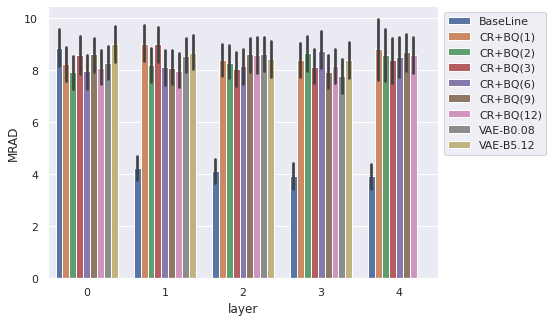

In [60]:
index = (Final_report['bit_faulty_pos']>-1) & (Final_report['layer']!=5)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.barplot(data=Final_report.loc[index],x='layer',y='MRAD',hue='split_config')
ax.legend(loc='lower left')
ax.tick_params(axis='x', labelrotation=0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#ax.set_title("MRAD: Different Fault rates in all configurations layer (4)")

<ipython-input-66-e289331f7d64>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


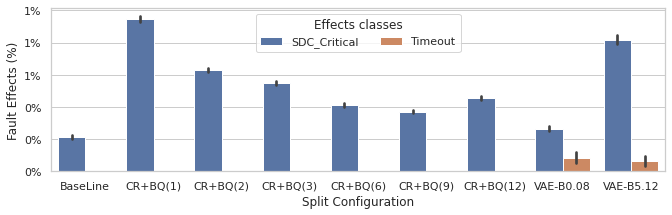

In [66]:

Final_report["SDC_Critical"]=Final_report['img_Top1_Crit']
Final_report["SDC_Safe"]=Final_report['img_Top1_SDC']
Final_report["Masked"]=Final_report['img_Top1_Masked']
Final_report["Timeout"]=0
only_timeouts=(Final_report['img_Top1_Crit']==1000) & (Final_report['img_Top1_SDC']==0) & (Final_report['img_Top1_Masked']==0) 
Final_report.loc[only_timeouts,'Timeout'] = Final_report.loc[only_timeouts,'img_Top1_Crit']
Final_report.loc[only_timeouts,"SDC_Critical"]=0


indexrate = (Final_report['split_config']=='VAE-B0.08') | (Final_report['split_config']=='VAE-B5.12')
Final_report.loc[indexrate,'SDC_Critical'] = Final_report.loc[indexrate,'SDC_Critical']/1000
Final_report.loc[indexrate,'SDC_Safe'] = Final_report.loc[indexrate,'SDC_Safe']/1000
Final_report.loc[indexrate,'Masked'] = Final_report.loc[indexrate,'Masked']/1000
Final_report.loc[indexrate,'Timeout'] = Final_report.loc[indexrate,'Timeout']/1000

Final_report.loc[~indexrate,'SDC_Critical'] = Final_report.loc[~indexrate,'SDC_Critical']/5000
Final_report.loc[~indexrate,'SDC_Safe'] = Final_report.loc[~indexrate,'SDC_Safe']/5000
Final_report.loc[~indexrate,'Masked'] = Final_report.loc[~indexrate,'Masked']/5000
Final_report.loc[~indexrate,'Timeout'] = Final_report.loc[~indexrate,'Timeout']/5000


Report=pd.melt(Final_report,
               id_vars=['layer', 'kernel', 'channel', 'row', 'col', 'bitmask', 
                        'bit_faulty_pos', 'gold_ACC@1', 'gold_ACC@k',
                        'img_Top1_Crit', 'MRADk', 'AbsAD', 'AbsADk', 'FsimID', 'split_config'
                        ],
               value_vars=['SDC_Critical','SDC_Safe','Masked','Timeout'],
               var_name='Effects',
               value_name='Images')


index = (Report['bit_faulty_pos']!=30) & (Report['layer']<5) & (Report['Effects']!='SDC_Safe') & (Report['Effects']!='Masked') 


sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(11, 3)) 
ax = sns.barplot(data=Report.loc[index],x='split_config',y='Images',hue='Effects')
sns.move_legend(ax, "upper center", ncol=4,title='Effects classes',bbox_to_anchor=(0.5,1.0))
ax.set_ylabel('Fault Effects (%)')
ax.set_xlabel('Split Configuration')
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.tick_params(axis='x', labelrotation=0)
#sns.move_legend(ax, "upper right")
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
f.savefig('W_Fault_effects.pdf',format='pdf',bbox_inches='tight')